<a href="https://colab.research.google.com/github/shubhamptw/DigitRecognizer/blob/master/digit_recognizer_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import random
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.framework import ops

In [0]:
(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig)= tf.keras.datasets.mnist.load_data()

In [59]:
np.shape(X_test_orig)

(10000, 28, 28)

8


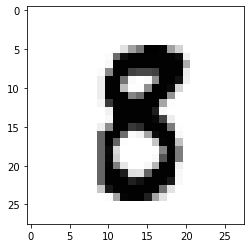

In [60]:
index=3643
print(Y_train_orig[index])
plt.imshow(X_train_orig[index],cmap='Greys')

In [0]:
# reshaping train and test and adding a dimension cos each image is grey and mush be of shape 
# len*width*1
X_train=X_train_orig.reshape(X_train_orig.shape[0],X_train_orig.shape[1]*X_train_orig.shape[2])
X_test=X_test_orig.reshape(X_test_orig.shape[0],X_test_orig.shape[1]*X_test_orig.shape[2])
Y_train=Y_train_orig.reshape(Y_train_orig.shape[0],1)
Y_test=Y_test_orig.reshape(Y_test_orig.shape[0],1)



In [0]:
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")
Y_train=Y_train.astype("float32")
Y_test=Y_test.astype("float32")
X_train/=255
X_test/=255;

In [63]:
np.shape(X_train)

(60000, 784)

In [0]:
# now train model 
# if wanna add regularization  add kernel_regularizer=keras.regularizers.l2(l=0.0001) in model.add func
model=keras.Sequential()
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))



In [0]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [96]:

print(np.shape(X_train))
print(np.shape(Y_train))

(60000, 784)
(60000, 1)


In [97]:
model.fit(X_train,Y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2075 - accuracy: 0.9377
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0857 - accuracy: 0.9726
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0586 - accuracy: 0.9813
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0429 - accuracy: 0.9859
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0338 - accuracy: 0.9890
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9912
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9918
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0196 - accuracy: 0.9935
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0178 - accuracy: 0.9939
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.016

In [98]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1164 - accuracy: 0.9822


[0.11644819378852844, 0.982200026512146]

In [0]:
model.save("/content/drive/My Drive/dl_folder/digit_recog_mnist_model.h5")